# Входные параметры для анализа

In [1]:
main_company_ = 'Delivery Club'

#названия и домены групп информационных компонент в VK
inf_comp_domains_ = {"Экология": "greenpeace_ru", "Социальный прогресс": "wonderzine", "Экономическое развитие": "rueconomics", "Инновационность": 'forinnovations', "Присутствие бренда работодателя": "futuretoday", "Интеграция": "gov"}

#названия и домены групп компаний в VK
companies_domains_ = {'Почта России': "russianpost",
                        "DHL": "dhlclub",
                        "СДЭК": "cdek_express",
                        "ПЭК": 'pecom',
                        "OZON": 'ozon',
                        "AliExpress": "aliexpress",
                        "DPD": "dpdru",
                        "Boxberry": "boxberry_ru",
                        "Деловые Линии": "dellin_ru",
                        "Delivery Club": "deliveryclub",
                        "Яндекс.Еда": "eda.yandex",
                        "РЖД Логистика": "rzdlogistics",
                        "FM Logistic": "fmlogistic_russia"
                       }


#токены для анализа (в списках) на частотность появления в комментариях
# на существительные - сущ, на прил - прил, на глаголы - глаголы, прич и деепприч, на наречия - наречия
# опоздать, медленно, задержка, долго, поздно
find_lexemes_ = {
    'опоздать': ['опоздание', 'поздняя', "опоздал", "поздно", "опоздавший", "опоздав"],
    'медленно': ["медлишь", "медленно", "медленный", "замедляя", "замедливший", "медлительность"],
    'задержка': ["задержались", "задерживаешься", "задержанный", "задержавшись", "задержек"],
    'долго': ["долго", "долгий"]
}

In [2]:
# модуль интеграции сбора и анализа данных

def complete_analysis(main_company, inf_comp_domains, companies_domains, find_lexemes):
    
    #сбор данных
    inf_comp_tokens = sbor_zapisei_vk(inf_comp_domains)

    test = sbor_zapisei_vk(companies_domains)
    test_text = test[0]
    test_posts_id = test[1]
    test_date = test[2]
    test_comp_id = test[3]

    
    #анализ данных
    test_prepr_texts, tokens_len = preprocess_text_in_dict(test_text) #длину токенов можно вывести на экран
    test_prepr_inf_comps = preprocess_text_in_dict(inf_comp_tokens[0])[0]

    unique_index_results, X_matrix = unique_index(test_prepr_texts) #можно вывести на экран

    test_inf_com_app = inf_comp_appearance(test_prepr_texts, test_prepr_inf_comps) #можно вывести на экран

    test_comms = sbor_kommentov_vk(test_comp_id, test_posts_id, test_date)
    test_prepr_comms, tokens_comms_len = preprocess_text_in_dict(test_comms)

    test_find_lexemes_analyzer = find_lexemes_analyzer(find_lexemes, test_comms, tokens_comms_len) #можно вывести на экран

    test_sentiment = comments_sentiment(test_comms) #можно вывести на экран

    #код для статистики чтоб показать бигдату
    token_compont_len_dict = {}

    for key in test_prepr_inf_comps.keys():
        token_component_len = 0
        for texts in test_prepr_inf_comps[key]:
            token_component_len += len(texts.split(' '))
        token_compont_len_dict[key] = token_component_len

    print("Количество собранных токенов информационных компонент:")
    for i_comp_, ic_token in token_compont_len_dict.items():
        print('\t{}: {} токенов'.format(i_comp_, ic_token))
    print("Собрано записей в группах компаний в VK: {}".format(sum([len(test_text[x]) for x in test_text.keys()])))
    print("Собрано комментариев в группах компаний в VK: {}".format(sum([len(test_comms[x]) for x in test_comms.keys()])))
    
    return {'tokens_len': tokens_len,
           'unique_index_results': unique_index_results,
           'X_matrix': X_matrix,
           'test_inf_com_app': test_inf_com_app,
           'test_find_lexemes_analyzer': test_find_lexemes_analyzer,
           'test_sentiment': test_sentiment}

In [4]:
#код для проведения анализа - запускать после того, как запущен послеследующий блокнот
comp_anly = complete_analysis(main_company_, inf_comp_domains_, companies_domains_, find_lexemes_)
comp_anly

Собраны посты по компании или компоненте Экология
Собраны посты по компании или компоненте Социальный прогресс
Собраны посты по компании или компоненте Экономическое развитие
Собраны посты по компании или компоненте Инновационность
Собраны посты по компании или компоненте Присутствие бренда работодателя
Собраны посты по компании или компоненте Интеграция
Собраны посты по компании или компоненте Почта России
Собраны посты по компании или компоненте DHL
Собраны посты по компании или компоненте СДЭК
Собраны посты по компании или компоненте ПЭК
Собраны посты по компании или компоненте OZON
Собраны посты по компании или компоненте AliExpress
Собраны посты по компании или компоненте DPD
Собраны посты по компании или компоненте Boxberry
Собраны посты по компании или компоненте Деловые Линии
Собраны посты по компании или компоненте Delivery Club
Собраны посты по компании или компоненте Яндекс.Еда
Собраны посты по компании или компоненте РЖД Логистика
Собраны посты по компании или компоненте FM

Количество собранных токенов информационных компонент:
	Экология: 76014 токенов
	Социальный прогресс: 74621 токенов
	Экономическое развитие: 416132 токенов
	Инновационность: 25512 токенов
	Присутствие бренда работодателя: 35412 токенов
	Интеграция: 78992 токенов
Собрано записей в группах компаний в VK: 3143
Собрано комментариев в группах компаний в VK: 27481


{'tokens_len': {'Почта России': 6171,
  'DHL': 8054,
  'СДЭК': 21163,
  'ПЭК': 14544,
  'OZON': 15353,
  'AliExpress': 11344,
  'DPD': 6093,
  'Boxberry': 13789,
  'Деловые Линии': 19277,
  'Delivery Club': 5756,
  'Яндекс.Еда': 873,
  'РЖД Логистика': 1886,
  'FM Logistic': 478},
 'unique_index_results': {'Почта России': 0.5479097341243978,
  'DHL': 0.4882539961466424,
  'СДЭК': 0.515739698389898,
  'ПЭК': 0.6613008978321133,
  'OZON': 0.6684267338381457,
  'AliExpress': 0.5791846283561035,
  'DPD': 0.5020386801819446,
  'Boxberry': 0.48448168763745564,
  'Деловые Линии': 0.5885777841308776,
  'Delivery Club': 0.5227722220195855,
  'Яндекс.Еда': 0.6793278588925967,
  'РЖД Логистика': 0.6308002177531361,
  'FM Logistic': 0.7382405375589078},
 'X_matrix': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 2, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64),
 'test_inf

In [7]:
#эти данные поступают в блок визуализации
tokens_len = comp_anly['tokens_len']
unique_index_results = comp_anly['unique_index_results']
X_matrix = comp_anly['X_matrix']
test_inf_com_app = comp_anly['test_inf_com_app']
test_find_lexemes_analyzer = comp_anly['test_find_lexemes_analyzer']
test_sentiment = comp_anly['test_sentiment']
companies_list = list(companies_domains_.keys())

# Блоки сбора и анализа данных

In [3]:
def sbor_zapisei_vk(comp_domains):    

    import requests
    import json
    import csv
    from datetime import datetime, date, time, timezone
    from dateutil.relativedelta import relativedelta
    import pandas as pd

    pd.DataFrame(["", ""]).to_excel('All posts.xlsx')

    url = 'https://api.vk.com/method/wall.get'

    #функции для извлечения года, месяца и дня из даты формата unix timestamp
    def norm_year(date):
        return int(datetime.utcfromtimestamp(date).strftime('%Y'))

    def norm_month(date):
        return int(datetime.utcfromtimestamp(date).strftime('%m'))

    def norm_date(date):
        return str(datetime.utcfromtimestamp(date).strftime('%Y-%m-%d'))
    
    all_posts_text = {} #словарь текстов
    all_posts_id = {} #словарь id записей для сбора комментариев
    all_posts_date = {} #словарь дат для сбора комментариев
    comp_id = {}

    for comp in comp_domains:

        comp_post_text = []
        comp_post_id = []
        comp_post_date = []

        offset = 0
        
        today = date.today()
        
        year_ago = today - relativedelta(years=1)
        
        dt = datetime.combine(year_ago, time.min)
        year_ago_unix = dt.replace(tzinfo=timezone.utc).timestamp()
        last_post_date = year_ago_unix + 1
        
        while last_post_date > year_ago_unix: 
            inf = requests.get(url, params = {'access_token': 'e9126258e9126258e9126258ede966938aee912e9126258b6a30a2bbaf2c0a42a0efcc6',
                                              'v':5.124,
                                              'domain':comp_domains[comp],
                                              'count':100,
                                              'offset':offset
                                            }
                             )
            inf_0 = inf.json()['response']['items']
            c_id = inf_0[0]['owner_id']
            comp_id.update({comp: c_id})
            for post in inf_0:
                post_year = norm_year(post['date']) #удалить???
                post_month = norm_month(post['date']) #удалить???
                
                if post['date'] > year_ago_unix:
                  comp_post_text.append(post['text'])
                  comp_post_id.append(post['id'])
                  comp_post_date.append(post['date'])
                
            last_post = inf_0[-1]
            last_post_year = norm_year(last_post['date'])
            last_post_date = last_post['date']
            offset += 100

        #comp_post_id.update({comp: posts_id_2019})
        all_posts_text[comp] = comp_post_text
        all_posts_id[comp] = comp_post_id
        all_posts_date[comp] = comp_post_date

        comp_post_df = pd.DataFrame(comp_post_text)

        #comp_post_df.to_excel("All posts.xlsx", sheet_name = comp)


        #with pd.ExcelWriter("All posts.xlsx", mode = "a") as writer:  
         # comp_post_df.to_excel(writer, sheet_name=comp)

        print('Собраны посты по компании или компоненте ' + comp)
    return [all_posts_text, all_posts_id, all_posts_date, comp_id]



def sbor_kommentov_vk(comp_id, all_posts_id, all_posts_date):
  #from dostoevsky.tokenization import RegexTokenizer
  #from dostoevsky.models import FastTextSocialNetworkModel

  #tokenizer = RegexTokenizer()
  #model = FastTextSocialNetworkModel(tokenizer=tokenizer)

  import requests
  import json
  import csv
  from datetime import datetime, date, time, timezone
  from dateutil.relativedelta import relativedelta

  import pandas as pd

  pd.DataFrame(["", ""]).to_excel('All comms.xlsx')
  url = 'https://api.vk.com/method/wall.getComments'

  def norm_month(date):
        return int(datetime.utcfromtimestamp(date).strftime('%m'))

  token_1 = '3c53fd1c3c53fd1c3c53fd1c333c27856933c533c53fd1c63e2a32dfabc9354f8c687ab'
  token_2 = 'c698f6bec698f6bec698f6beacc6ec07dccc698c698f6be9929a1afb8f64b7d24c5941f'
  token_used = token_1
  req_counter = 0

  comp_tonality = {}
  all_comms = {}

  for comp in all_posts_id:
      comp_comms = []

      date_id = dict(zip(all_posts_date[comp], all_posts_id[comp]))

      #отбор id-постов по 10 на каждый месяц

      selected_date_id = {}

      month = 12
      post_counter = 10
      for post in all_posts_date[comp]:
          if norm_month(post) != month:
              month = norm_month(post)
              post_counter = 10
          if post_counter > 0:
              selected_date_id[post] = date_id[post]
              post_counter -= 1

      for post in selected_date_id.values():
              req_counter +=1
              if req_counter > 1999:
                  token_used = token_2
              inf = requests.get(url, params = {'access_token': token_used,
                                                'v':5.124,
                                                'owner_id': comp_id[comp],
                                                'post_id': post,
                                                'count':100
                                              }
                                )
              inf_0 = inf.json()['response']['items']
              for comm in inf_0:
                  if 'text' in comm:
                      text_com = comm['text']
                      comp_comms.append(text_com)
      
      all_comms[comp] = comp_comms

      comp_comms_df = pd.DataFrame(comp_comms)
      #with pd.ExcelWriter("All comms.xlsx", mode = "a") as writer:  
       #   comp_comms_df.to_excel(writer, sheet_name=comp)
  return all_comms



#улучшенный токенизатор
import re
import pymorphy2
morph = pymorphy2.MorphAnalyzer()
import nltk
nltk.download("stopwords")
#--------#
from string import punctuation

from nltk.corpus import stopwords
russian_stopwords = stopwords.words("russian")

def preprocess_text(text):
    words = re.split(r'[^а-яА-Я]', text) # разбиваем текст на слова
    tokens = list()
    for word in words:
        p = morph.parse(word)[0]
        if p.tag.POS not in ['NPRO', 'PREP', 'CONJ', 'PRCL', 'INTJ', 'NUMR']:
            tokens.append(p.normal_form)
    tokens = [token for token in tokens if token not in russian_stopwords\
                and token != " " \
                and token.strip() not in punctuation]
    company_tokens_text_len = len(tokens)

    return " ".join(tokens), company_tokens_text_len



def preprocess_text_in_dict(dict_):
    prepr_dict = {}
    tokens_len = {}
    for company in dict_.keys():
        prepr_texts_and_len = [preprocess_text(x) for x in dict_[company]]
        prepr_texts = [x[0] for x in prepr_texts_and_len]
        len_ = [x[1] for x in prepr_texts_and_len]
        prepr_dict[company] = prepr_texts
        tokens_len[company] = sum(len_)
    return prepr_dict, tokens_len




def join_text(dict_):
    joined_comms = {}

    for comp, comms in dict_.items():
      joined = ". ".join(comms)
      joined_comms[comp] = joined

    return joined_comms




def unique_index(dict_):

    company_tokens = join_text(dict_)

    from sklearn.feature_extraction.text import CountVectorizer
    import scipy
    import numpy as np

    vectorizer = CountVectorizer()

    X = vectorizer.fit_transform(company_tokens.values()).toarray()

    rasst_list = []

    for u in X:
        rasst_list_u = []
        for v in X:
            rasst = scipy.spatial.distance.cosine(u, v)
            if rasst != 0:
                rasst_list_u.append(rasst)
        rasst_list.append(np.mean(rasst_list_u))

    image_uniqueness = dict(zip(company_tokens.keys(), rasst_list))

  
    return image_uniqueness, X



def inf_comp_appearance(companies_tokens, component_tokens):

    inf_component_tokens = join_text(component_tokens)
    company_tokens = join_text(companies_tokens)


    from sklearn.feature_extraction.text import CountVectorizer
    import scipy
    import numpy as np

    vectorizer = CountVectorizer()

    inf_component_tokens.update(company_tokens)
    X = vectorizer.fit_transform(inf_component_tokens.values()).toarray()

    rasst_list = []
    
    for u in X[:len(component_tokens)]:
        rasst_comp = []
        for v in X[len(component_tokens):]:
            rasst = scipy.spatial.distance.cosine(u, v)
            rasst_comp.append(rasst)
        rasst_companies_dict = dict(zip(companies_tokens.keys(), rasst_comp))
        rasst_list.append(rasst_companies_dict)
    
    rasst_dict = dict(zip(component_tokens.keys(), rasst_list))

    return rasst_dict




def find_lexemes_analyzer(find_lexemes_dict, test_comms_dict_, tokens_comms_len):
    common_lex_list = []

    for lists_ in find_lexemes_dict.values():
        common_lex_list.extend(lists_)


    lexemes_list = []

    for word in common_lex_list:
        word_lexemes_list = morph.parse(word)[0].lexeme
        for lexeme_elem in range(len(word_lexemes_list)):
            lexemes_list.append(word_lexemes_list[lexeme_elem][0])

    unique_lexemes_list = list(set(lexemes_list))

    import re
    from collections import Counter

    counter_dict = {}
    for label in test_comms_dict_.keys():
        word_list = []
        for line in test_comms_dict_[label]:
            line = line.lower()
            word_list_line = re.split(r'[^а-яА-Я]', line)
            for word in word_list_line:
                if word != '':
                    word_list.append(word)

        c = Counter(word_list)

        needed_dict = {}
        for k, v in c.items():
            if k in unique_lexemes_list:
                needed_dict[k] = v

        sum_ = sum(needed_dict.values())
        freq = sum_ / tokens_comms_len[label] * 1000
        counter_dict[label] = freq

    return counter_dict



def comments_sentiment(comments_dict):
    import numpy as np
    from dostoevsky.tokenization import RegexTokenizer
    from dostoevsky.models import FastTextSocialNetworkModel
    from sklearn.preprocessing import StandardScaler

    tokenizer = RegexTokenizer()
    model = FastTextSocialNetworkModel(tokenizer=tokenizer)
    
    comp_tonality = []
    comp_emotionality = []
    
    for company, comments in comments_dict.items():
        company_tonality = []
        company_emotionality = []
        for comment in comments:
            if comment != '':
                stata = model.predict([comment])
                tonality = stata[0]['positive'] / stata[0]['negative']
                emotionality = (stata[0]['positive'] + stata[0]['negative']) / stata[0]['neutral']
                if tonality > 100:
                    tonality = 100
                if tonality < 0.01:
                    tonality = 0.01
                if emotionality > 100:
                    emotionality = 100
                if emotionality < 0.01:
                    emotionality = 0.01
                company_tonality.append(tonality)
                company_emotionality.append(emotionality)
        comp_tonality.append(np.mean(company_tonality))
        comp_emotionality.append(np.mean(company_emotionality))
        
    #matrix_for_scaling = np.vstack((np.array(comp_tonality), np.array(comp_emotionality))).T
    #scaler = StandardScaler()
    #scaled_data = scaler.fit_transform(matrix_for_scaling)
    
    #scaled_comp_tonality = dict(zip(comments_dict.keys(), scaled_data[:,0]))
    #scaled_comp_emotionality = dict(zip(comments_dict.keys(), scaled_data[:,1]))
    dict_comp_tonality = dict(zip(comments_dict.keys(), comp_tonality))
    dict_comp_emotionality = dict(zip(comments_dict.keys(), comp_emotionality))
    
    return dict_comp_tonality, dict_comp_emotionality

def get_color_map(compa_list):
    color_list_ = []
    for company_ in compa_list:
        if company_ != main_company_:
            color_list_.append('b')
        else:
            color_list_.append('r')
    return color_list_

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\A\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Визуализация

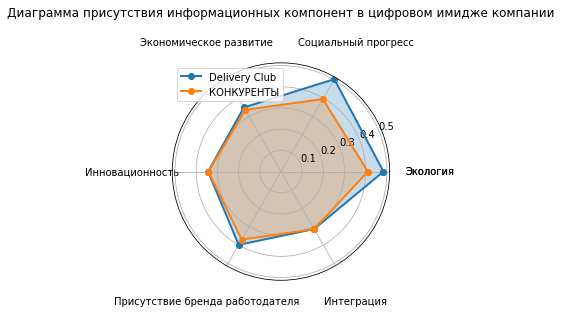

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_comp = pd.DataFrame(test_inf_com_app)

stats= data_comp.loc[main_company_]

angles=np.linspace(0, 2*np.pi, len(data_comp.columns), endpoint=False)
# close the plot
stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))

konkurenti_mean = data_comp.drop(main_company_).mean(axis = 'index')

konkurenti_mean.values

konkurenti_mean = np.concatenate((konkurenti_mean.values,[konkurenti_mean[0]]))

fig=plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, 1 - stats, 'o-', linewidth=2)
ax.fill(angles, 1 - stats, alpha=0.25)
ax.plot(angles,1 - konkurenti_mean,'o-', linewidth=2)
ax.fill(angles, 1 - konkurenti_mean, alpha=0.25)
test_list = list(data_comp.columns)
test_col = list(data_comp.columns)[0]
test_list.append(test_col)

test_list
ax.set_thetagrids(angles * 180/np.pi, test_list)
ax.tick_params(pad = 30)
ax.set_title('Диаграмма присутствия информационных компонент в цифровом имидже компании\n')
ax.grid(True)
#ax.legend(['Почта России', 'КОНКУРЕНТЫ({})'.format(data_comp.drop(["Почта России"]).index.values)], loc = 'upper right')
ax.legend([main_company_, 'КОНКУРЕНТЫ'], loc = 'upper left')

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

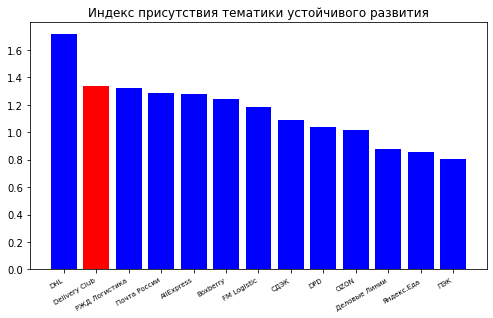

In [30]:
data_comp['СУММА'] = data_comp.loc[:,['Экология', 'Социальный прогресс',
                                    'Экономическое развитие']].sum(axis = 1)

data_comp_values = 3 - data_comp['СУММА'].sort_values()

fig=plt.figure(figsize = (18,10))
ax = fig.add_subplot(222)
ax.bar(data_comp_values.index,data_comp_values, color = get_color_map(data_comp_values.index))
ax.set_title('Индекс присутствия тематики устойчивого развития')
#поворот x-labels на 30 градусов, чтобы они не наезжали друг на друга
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right', fontsize='x-small')

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

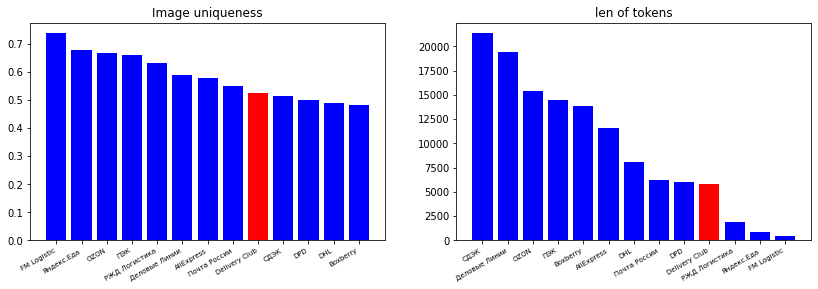

In [31]:
unique = pd.DataFrame({"image_uniqueness": unique_index_results, "token_len": tokens_len})

fig, axes = plt.subplots(ncols=2, figsize=(14,4))
unique.sort_values(by=['image_uniqueness'], ascending = False, inplace = True)
axes[0].bar(unique.index,unique['image_uniqueness'].values, color = get_color_map(unique.index))
unique.sort_values(by=['token_len'], ascending = False, inplace = True)
axes[1].bar(unique.index,unique['token_len'].values, color = get_color_map(unique.index))
axes[0].set_title('Image uniqueness')
axes[1].set_title('len of tokens')
plt.setp(axes[0].get_xticklabels(), rotation=30, horizontalalignment='right', fontsize='x-small')
plt.setp(axes[1].get_xticklabels(), rotation=30, horizontalalignment='right', fontsize='x-small')

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

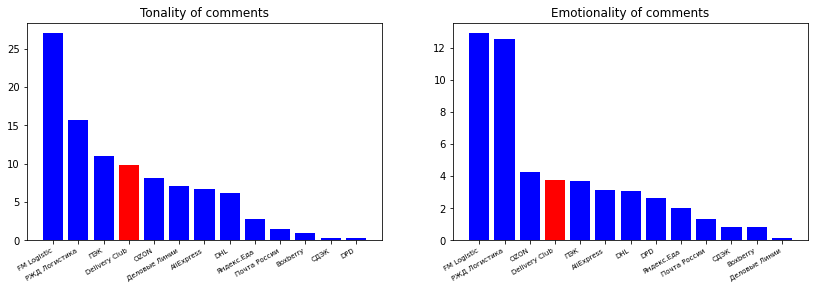

In [32]:
sentiment_df = pd.DataFrame({"comp_tonality": test_sentiment[0], "comp_emotionality": test_sentiment[1]})

fig, axes = plt.subplots(ncols=2, figsize=(14,4))
sentiment_df.sort_values(by=['comp_tonality'], ascending = False, inplace = True)
axes[0].bar(sentiment_df.index,sentiment_df['comp_tonality'].values, color = get_color_map(sentiment_df.index))
sentiment_df.sort_values(by=['comp_emotionality'], ascending = False, inplace = True)
axes[1].bar(sentiment_df.index,sentiment_df['comp_emotionality'].values, color = get_color_map(sentiment_df.index))
axes[0].set_title('Tonality of comments')
axes[1].set_title('Emotionality of comments')
plt.setp(axes[0].get_xticklabels(), rotation=30, horizontalalignment='right', fontsize='x-small')
plt.setp(axes[1].get_xticklabels(), rotation=30, horizontalalignment='right', fontsize='x-small')

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

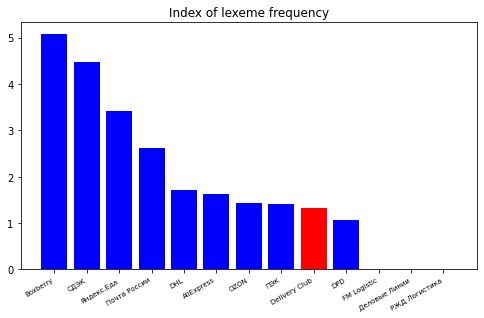

In [33]:
find_lexemes_df = pd.DataFrame({"find_lexemes": test_find_lexemes_analyzer})

fig=plt.figure(figsize = (18,10))
ax = fig.add_subplot(222)

find_lexemes_df.sort_values(by=['find_lexemes'], ascending = False, inplace = True)
ax.bar(find_lexemes_df.index,find_lexemes_df['find_lexemes'].values, color = get_color_map(find_lexemes_df.index))
ax.set_title('Index of lexeme frequency')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right', fontsize='x-small')

Text(0.5, 1.0, 'Digital image map')

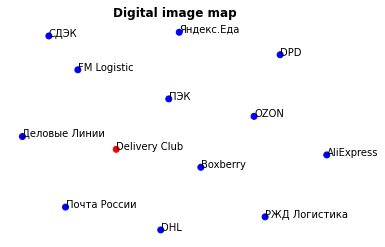

In [34]:
#новый visualizer

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(X_matrix)

from sklearn.manifold import TSNE
tsne_alg = TSNE(random_state = 321)
tsne_representation = tsne_alg.fit_transform(scaled_data)
y = tsne_representation[:,0]
z = tsne_representation[:,1]
n = companies_list

fig, ax = plt.subplots()
ax.scatter(z, y, c = get_color_map(n))

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i], y[i]))
    
ax.grid(False)
plt.axis('off')
plt.title('Digital image map', fontweight="bold")

# Черновые блокноты:

In [6]:
#старый токенизатор

import pymorphy2
morph = pymorphy2.MorphAnalyzer()
import nltk
nltk.download("stopwords")
#--------#
from string import punctuation

from nltk.corpus import stopwords
russian_stopwords = stopwords.words("russian")

def preprocess_text(text):
    words = text.split() # разбиваем текст на слова
    tokens = list()
    for word in words:
        p = morph.parse(word)[0]
        tokens.append(p.normal_form)
    tokens = [token for token in tokens if token not in russian_stopwords\
                and token != " " \
                and token.strip() not in punctuation]
    company_tokens_text_len = len(tokens)

    return " ".join(tokens), company_tokens_text_len

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\A\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [89]:
test_prepr_inf_comps['Экология'][:10]

['глобальный экологический проблема решить объединиться весь вместе работать вместе человек наш волонт рами инициативный группа разный некоммерческий организация объединение помощь природоохранный кампания показывать путь решение экологический проблема который обеспечить устойчивый развитие социальный справедливость планета ссылка наш остальной социальный сеть телеграм инстагра поддержать наш работа',
 'пока нефть ида северный ледовитый океан россия принимать председательство арктический совет который заниматься защита окружающий среда устойчивый развитие приполярный район накануне сергей лавров заявить россия добиваться выполнение парижский соглашение климат природоохранный инициатива пока наблюдать обратный житель литр вдоль река печора колва сообщать нефтяной площадь нке который спускаться сторона океан подробность гринпискризис',
 'белый журавль стерх редкий птица россия стерх гнездиться наш страна стерх моногамный выводить потомство любовь восстанавливать популяция сложный куноват

In [101]:
test_prepr_texts['Почта России'][:10]

['отвечать вопрос прошлое пост рубрика запрещенкаилинуть красный икра отправить герметичный упаковка протечь оформить отправка прямо приложение отдать е отделение очередь забыть распечатать заполнить бланк запрещенкаилинуть',
 'бытькакматветь инструкция сделать опись посылка начать оформлять посылка сайт заполнить весь поль форма поставить галочка пункт опись вложение указать ценность посылка нажать оформить следующий страница подробно заполнить дать отправитель получатель заполнить бланк опись получить трек номер распечатать бланк проверить получиться экземпляр закрывать посылка приходить почта наш сотрудник сверить состав отправление бланк поставить печать дата подпись смочь подтвердить получатель конкретно отправить случиться отправление путь компенсировать стоимость предмет указанный бланк опись бытькакматветь',
 'ещ месяц назад тысяча человек писать наш сборный футбол новогодний поздравление желать круто выступить евро чемпионат начн тся футболист нужный слово поддержка написать и

In [14]:
#нерабочий код

def token_len(companies_tokens):
  joined_dict = join_text(companies_tokens)
  len_dict = {}
  for company, tokens in joined_dict.items():
    len_dict[company] = len(tokens)
  return len_dict

In [128]:
# нерабочий код, mystem лемматизирует очень медленно


import nltk
nltk.download("stopwords")

from nltk.corpus import stopwords
from pymystem3 import Mystem
from string import punctuation

mystem = Mystem() 
russian_stopwords = stopwords.words("russian")

def preprocess_text(text):
    tokens = mystem.lemmatize(text.lower())
    tokens = [token for token in tokens if token not in russian_stopwords\
              and token != " " \
              and token.strip() not in punctuation]
    
    text = " ".join(tokens)
    
    return text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\A\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [92]:
#стемминг Портера, походу надо удалить


import re

class Porter:
	PERFECTIVEGROUND =  re.compile(u"((ив|ивши|ившись|ыв|ывши|ывшись)|((?<=[ая])(в|вши|вшись)))$")
	REFLEXIVE = re.compile(u"(с[яь])$")
	ADJECTIVE = re.compile(u"(ее|ие|ые|ое|ими|ыми|ей|ий|ый|ой|ем|им|ым|ом|его|ого|ему|ому|их|ых|ую|юю|ая|яя|ою|ею)$")
	PARTICIPLE = re.compile(u"((ивш|ывш|ующ)|((?<=[ая])(ем|нн|вш|ющ|щ)))$")
	VERB = re.compile(u"((ила|ыла|ена|ейте|уйте|ите|или|ыли|ей|уй|ил|ыл|им|ым|ен|ило|ыло|ено|ят|ует|уют|ит|ыт|ены|ить|ыть|ишь|ую|ю)|((?<=[ая])(ла|на|ете|йте|ли|й|л|ем|н|ло|но|ет|ют|ны|ть|ешь|нно)))$")
	NOUN = re.compile(u"(а|ев|ов|ие|ье|е|иями|ями|ами|еи|ии|и|ией|ей|ой|ий|й|иям|ям|ием|ем|ам|ом|о|у|ах|иях|ях|ы|ь|ию|ью|ю|ия|ья|я)$")
	RVRE = re.compile(u"^(.*?[аеиоуыэюя])(.*)$")
	DERIVATIONAL = re.compile(u".*[^аеиоуыэюя]+[аеиоуыэюя].*ость?$")
	DER = re.compile(u"ость?$")
	SUPERLATIVE = re.compile(u"(ейше|ейш)$")
	I = re.compile(u"и$")
	P = re.compile(u"ь$")
	NN = re.compile(u"нн$")

	def stem(word):
		word = word.lower()
		word = word.replace(u'ё', u'е')
		m = re.match(Porter.RVRE, word)
		if m and m.groups():
			pre = m.group(1)
			rv = m.group(2)
			temp = Porter.PERFECTIVEGROUND.sub('', rv, 1)
			if temp == rv:
				rv = Porter.REFLEXIVE.sub('', rv, 1)
				temp = Porter.ADJECTIVE.sub('', rv, 1)
				if temp != rv:
					rv = temp
					rv = Porter.PARTICIPLE.sub('', rv, 1)
				else:
					temp = Porter.VERB.sub('', rv, 1)
					if temp == rv:
						rv = Porter.NOUN.sub('', rv, 1)
					else:
						rv = temp
			else:
				rv = temp
			
			rv = Porter.I.sub('', rv, 1)

			if re.match(Porter.DERIVATIONAL, rv):
				rv = Porter.DER.sub('', rv, 1)

			temp = Porter.P.sub('', rv, 1)
			if temp == rv:
				rv = Porter.SUPERLATIVE.sub('', rv, 1)
				rv = Porter.NN.sub(u'н', rv, 1)
			else:
				rv = temp
			word = pre+rv
		return word
	stem=staticmethod(stem)


    
Porter.stem(u'опоздание')

'опоздан'

In [39]:
# тестовый код, удали потом или передвинь в черновые блокноты

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_comp = pd.DataFrame(test_inf_com_app)

stats= data_comp.loc['Почта России']

angles=np.linspace(0, 2*np.pi, len(data_comp.columns), endpoint=False)
# close the plot
stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))

konkurenti_mean = data_comp.drop("Почта России").mean(axis = 'index')

konkurenti_mean.values

array([0.58842961, 0.60080061, 0.66522753, 0.65775407, 0.62569305,
       0.68679532])

In [51]:
# визуализация имиджа с t-SNE

def vectorize(companies_tokens):
    company_tokens = join_text(companies_tokens)

    from sklearn.feature_extraction.text import CountVectorizer
    import scipy
    import numpy as np

    vectorizer = CountVectorizer()

    X = vectorizer.fit_transform(company_tokens.values())
    return X

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

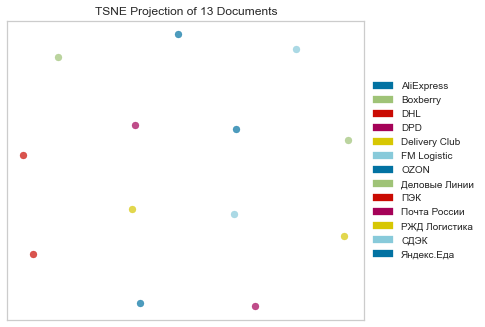

<AxesSubplot:title={'center':'TSNE Projection of 13 Documents'}>

In [61]:
#старый visualizer

from sklearn.feature_extraction.text import TfidfVectorizer

from yellowbrick.text import TSNEVisualizer

# Load the data and create document vectors
corpus = join_text(test_prepr_texts).values()
tfidf = TfidfVectorizer()

X = tfidf.fit_transform(corpus)

# Create the visualizer and draw the vectors
tsne = TSNEVisualizer()
tsne.fit_transform(X, list(test_prepr_texts.keys()))
tsne.show()

In [ ]:
len(test[1]['DHL']) == len(test[2]['DHL'])

True

In [ ]:
from dateutil.relativedelta import relativedelta
from datetime import datetime, date, time
today = date.today()
        
year_ago = today - relativedelta(years=2)

In [ ]:
from datetime import timezone
dt = datetime.combine(year_ago, time.min)
timestamp = dt.replace(tzinfo=timezone.utc).timestamp()
print(timestamp)

1552348800.0


In [ ]:
datetime.combine(today, time.min)

datetime.datetime(2021, 3, 12, 0, 0)

In [ ]:
today

datetime.date(2021, 3, 12)

In [ ]:
def func(n, p):
    print(n+ n**2, p)

In [ ]:
func(3, 6)

12 6
